#  BM20A6100 Advanced Data Analysis and Machine Learning
## Erik Kuitunen, 0537275

### Kernel Principal Component Analysis


Read data, scale and visualize


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Flowmeters/Meter A", delimiter="	", header=None)
col_names = df.columns.tolist() 

df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,32.451173,34.568685,33.082683,36.722005,36.969403,36.075847,36.051432,35.174155,32.729490,1
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,32.428385,34.441732,33.081055,36.687825,36.933595,36.054688,35.979818,34.847005,32.731122,1
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,32.428385,34.275715,33.113605,36.661785,36.873370,36.002605,35.963542,34.689128,32.771810,1
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,32.485350,34.080403,33.170573,36.673177,36.811525,35.974935,35.955403,34.500328,32.849935,1
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,32.503255,34.122720,33.164062,36.673177,36.826173,35.996095,35.968425,34.474283,32.853190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.792929,1.006295,0.999666,2.696691,3.414048,3.389731,2.699618,2.715628,3.414042,3.393569,...,32.555338,33.767905,33.300782,36.640627,36.691080,35.849610,35.834960,33.823245,33.012697,2
83,0.792309,1.004472,0.999873,2.679006,3.433638,3.386612,2.714345,2.699840,3.429142,3.380373,...,32.545573,33.769532,33.294272,36.634115,36.692707,35.859377,35.844727,33.819987,33.022460,2
84,0.793471,1.009560,1.001110,2.691553,3.431745,3.364790,2.717383,2.700560,3.432876,3.374046,...,32.561848,33.780925,33.287762,36.635745,36.694335,35.854492,35.831705,33.824870,33.020832,2
85,0.796730,1.010570,0.999029,2.714849,3.412818,3.388927,2.692776,2.738119,3.413739,3.381779,...,32.555338,33.774415,33.302410,36.640627,36.699218,35.859377,35.849610,33.816732,33.011067,2


<Axes: >

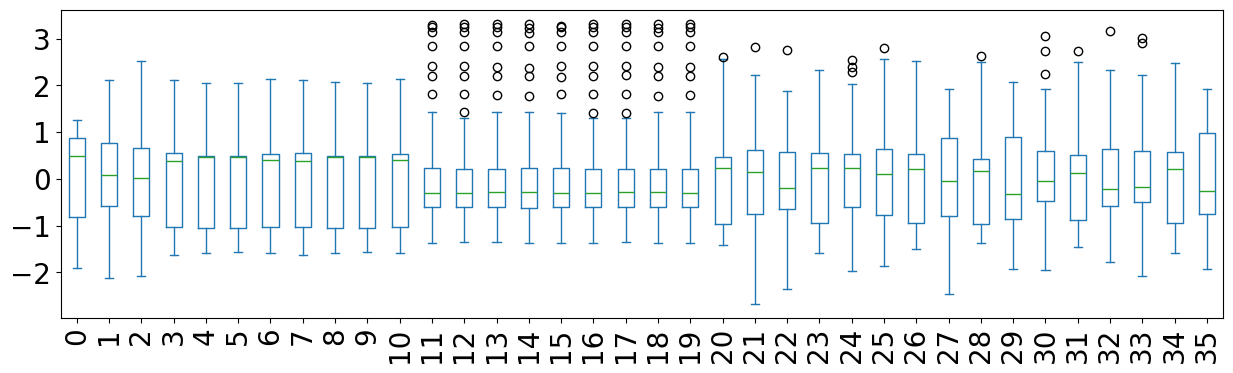

In [2]:
from sklearn.preprocessing import StandardScaler    

XData = df.iloc[ :, :-1 ].values
YData = df.iloc[ :, 1 ].values

scaler = StandardScaler()
scaler.fit( XData )
XData_scaled = scaler.transform( XData )

pd.DataFrame( XData_scaled ).plot( kind = 'box', 
                                   figsize = (15,4), 
                                   rot = 90, 
                                   fontsize = 20, 
                                   sharey = False )


Defining kernels

In [3]:
def linear_kernel(X1, X2):
    k_xixj = np.dot( X1, X2 )
    return k_xixj

def polynomial_kernel(X1, X2, degree = 2):
    k_xixj = ( np.dot( X1, X2 ) + 1 ) ** degree
    return k_xixj

def gaussian_kernel(X1, X2, sigma = 1):
    k_xixj = np.exp( -np.linalg.norm( X1 - X2 ) ** 2 / ( 2 * sigma ** 2 ) )
    return k_xixj

Calculating the Gram matrix using a kernel; centering 

In [10]:
# First using the linear kernel
def gram_centered( XData ):
    Nsamples = XData.shape[0]
    K = np.zeros( ( Nsamples, Nsamples ) )
    for ii in range( Nsamples ):
        for jj in range( ii, Nsamples ):
            elem = linear_kernel( XData[ ii, : ], XData[ jj, : ] )
            K[ ii, jj ] = linear_kernel( XData[ ii, : ], XData[ jj, : ] )
            
            if ii != jj:
                K[ jj, ii ] = K[ ii, jj ]

    I_n = np.eye( Nsamples )
    ones_n = np.ones( ( Nsamples, Nsamples ) )
    Ktilde = ( I_n - ones_n / Nsamples @ ones_n.T ) @ K @ ( I_n - ones_n / Nsamples @ ones_n.T )
    
    return Ktilde

PLS function. No cross-validation, since amont of data is low.

In [17]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import root_mean_squared_error

def optimisze_pls_cv( X_train, y_train, X_test, y_test, n_comp ):
    model = PLSRegression( n_components = n_comp ).fit( X_train, y_train )
    
    y_pred_train = model.predict( X_train )
    y_pred_test = model.predict( X_test )

    mse = root_mean_squared_error( y_test, y_pred_test )

    rss = sum( (y_pred_train - y_train ) ** 2 );
    tss = np.sum( (y_train - np.mean(y_train)) ** 2 )
    press = np.sum( (y_pred_test - y_test) ** 2 )
    
    r2 = 1 - rss / tss
    q2 = 1 - press / tss

    
    return y_pred_test, q2, r2, mse



Test-train split, performing PLS and visualizing metrics

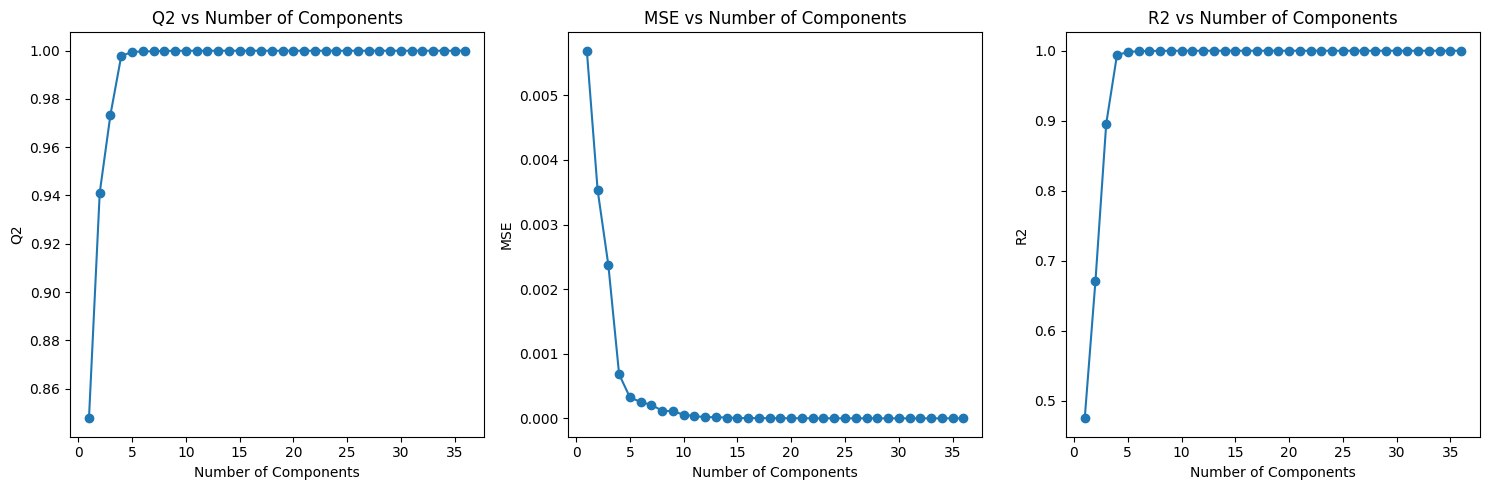

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( XData_scaled, YData, test_size = 0.2, random_state = 42 )

Nvariables = XData_scaled.shape[1]

q2vec = np.zeros( Nvariables )
r2vec = np.zeros( Nvariables )
mse_vec = np.zeros( Nvariables )
for ii in range( Nvariables):
    y_pred, q2, r2, mse = optimisze_pls_cv( X_train, y_train, X_test, y_test, ii + 1 )
    q2vec[ ii ] = q2
    r2vec[ ii ] = r2
    mse_vec[ ii ] = mse
    
    
components = np.arange(1, Nvariables+1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot( components, q2vec, marker='o' )
plt.title( 'Q2 vs Number of Components' )
plt.xlabel( 'Number of Components' )
plt.ylabel( 'Q2' )

plt.subplot(1, 3, 2)
plt.plot( components, mse_vec, marker='o' )
plt.title( 'MSE vs Number of Components' )
plt.xlabel( 'Number of Components' )
plt.ylabel( 'MSE' )

plt.subplot(1, 3, 3)

plt.plot(components, [optimisze_pls_cv(X_train, y_train, X_test, y_test, n_comp)[2] for n_comp in components], marker='o')
plt.title('R2 vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('R2')

plt.tight_layout()
plt.show()